<a href="https://colab.research.google.com/github/RonaldoSouzaEngComp/deep-learning-para-o-reconhecimento-da-linguagem-de-sinais-python/blob/main/Deep_Learning_para_o_reconhecimento_da_linguagem_de_sinais_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **01 - CARREGANDO O DATASET (BASE DE DADOS)**

OBS.: Antes de iniciar tem que alterar os dados **sign_mnist_tes.csv** e o **sign_mnist_train.csv**, pois estão com a label [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 23] tem um código disponível neste repositório para fazer a alteração para [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23].

A primeira **biblioteca** (módulo) a ser **importado** é o **Pandas** para manupular tabelas numéricas e séries temporais para análise de dados.

`import pandas`

Para simplificar a escrita é definido o no **pd** para chamar os módulos do pandas.

`import pandas as pd`

Agora para ler os a BASE DE DADOS é utilizado o comando

`pd.read_csv('nome_do_arquivo_ponto_csv')`

O comando acima lê o arquivo **CSV** e o armazena em um **DataFrame**.

**DataFrame:** 






In [ ]:
import pandas as pd

#dados_train = pd.read_csv('sign_mnist_train.csv')
#dados_teste = pd.read_csv('sign_mnist_test.csv')
dados_train = pd.read_csv('sign_mnist_train_alterado.csv')
dados_teste = pd.read_csv('sign_mnist_test_alterado.csv')

#ORDENA OS INDICES DE CADA IMAGEM EM PIXEL DO CONJUNTO DE TESTE
indice_letras_teste = sorted(dados_teste['label'].unique()) 
print("Indice das Letras: ", indice_letras_teste)

#ORDENA OS INDICES DE CADA IMAGEM EM PIXEL DO CONJUNTO DE TREINAMENTO
indice_letras_train = sorted(dados_train['label'].unique()) 
print("Indice das Letras: ", indice_letras_train)

print("Quantidade de amostras do Conjunto de Train: ", dados_train.shape[0])
print("Qunatidade de amostras do Conjunto de Teste: ", dados_teste.shape[0])

Indice das Letras:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Indice das Letras:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Quantidade de amostras do Conjunto de Train:  27455
Qunatidade de amostras do Conjunto de Teste:  7172


#02 - ORGANIZAÇÃO DOS DADOS DE TREINAMENTO E TESTE

In [ ]:
from sklearn.preprocessing   import LabelBinarizer
from sklearn.model_selection import train_test_split

# COPIA A BASE DE DADOS DE TRAINAMENTOS PARA A VARIÁVEL dados_train_pixels
dados_train_pixels = dados_train.copy()

# COPIA A BASE DE DADOS DE TESTES PARA A VARIÁVEL dados_teste_pixels
dados_teste_pixels = dados_teste.copy()

# DELETA A COLUNA LABEL DA BASE DE TREINAMENTO
dados_train_pixels.drop('label', axis = 1, inplace = True)
print("dados_train_pixels: \n ", dados_train_pixels)

# DELETA A COLUNA LABEL DA BASE DE TESTE
dados_teste_pixels.drop('label', axis = 1, inplace = True)

print("---------------------------------------------------------------------------")
# CRIA A VARIÁVEL COM O INDICE RELACIONADO A CADA LETRA DO CONJUNTO DE TREINAMENTO
dados_train_indice_letras = dados_train['label']
print("dados_train_indice_letras: \n", dados_train_indice_letras)

# CRIA A VARIÁVEL COM O INDICE RELACIONADO A CADA LETRA DO CONJUNTO DE TESTE
saida_teste_letras = dados_teste['label']

# CRIA A VARIÁVEL COM A QUANTIDADE DE LETRAS
quantidade_letras = len(dados_train_indice_letras.unique())

# CRIA AS VARIÁVEIS PARA O TREINAMENTO E VALIDAÇÃO
(dados_input_train_pixels,
 dados_input_valid_pixels,
 saida_train_letras,  
 saida_valid_letras) = train_test_split(dados_train_pixels, 
                                        dados_train_indice_letras, 
                                        test_size = 0.08)

dados_input_teste_pixels = dados_teste_pixels

# CONVERTE O INDICE DAS LETRAS PARA A REPRESENTAÇÃO EM BINÁRIO
letra_binario             = LabelBinarizer()
dados_train_binario_letra = letra_binario.fit_transform(saida_train_letras)
dados_valid_binario_letra = letra_binario.fit_transform(saida_valid_letras)
dados_teste_binario_letra = letra_binario.fit_transform(saida_teste_letras)

# CRIA A VARIÁVEIS PARA O TREINAMENTO E TESTE DA REDE NEURAIS
dados_entrada_train_pixels = dados_input_train_pixels.values.reshape(dados_train_binario_letra.shape[0],28,28,1)
dados_entrada_valid_pixels = dados_input_valid_pixels.values.reshape(dados_valid_binario_letra.shape[0],28,28,1)
dados_entrada_teste_pixels = dados_input_teste_pixels.values.reshape(dados_teste_binario_letra.shape[0],28,28,1)

# CRIA AS VARIÁVEIS PARA VERIFICAÇÃO NO TREINAMENTO 
dados_saida_train_letras = dados_train_binario_letra.reshape(dados_train_binario_letra.shape[0], quantidade_letras)
dados_saida_valid_letras = dados_valid_binario_letra.reshape(dados_valid_binario_letra.shape[0], quantidade_letras) 
dados_saida_teste_letras = dados_teste_binario_letra.reshape(dados_teste_binario_letra.shape[0], quantidade_letras)


dados_train_pixels: 
         pixel1  pixel2  pixel3  pixel4  ...  pixel781  pixel782  pixel783  pixel784
0         107     118     127     134  ...       206       204       203       202
1         155     157     156     156  ...       175       103       135       149
2         187     188     188     187  ...       198       195       194       195
3         211     211     212     212  ...       225       222       229       163
4         164     167     170     172  ...       157       163       164       179
...       ...     ...     ...     ...  ...       ...       ...       ...       ...
27450     189     189     190     190  ...       234       200       222       225
27451     151     154     157     158  ...       195       195       195       194
27452     174     174     174     174  ...       203       202       200       200
27453     177     181     184     185  ...        47        64        87        93
27454     179     180     180     180  ...       197       205  

#03 - GRÁFICO - QUANTIDADE DE CADA AMOSTRA DO DATASET (BASE DE DADOS)

indice_graf_01:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
[ 0.45  1.45  2.45  3.45  4.45  5.45  6.45  7.45  8.45  9.45 10.45 11.45
 12.45 13.45 14.45 15.45 16.45 17.45 18.45 19.45 20.45 21.45 22.45 23.45]


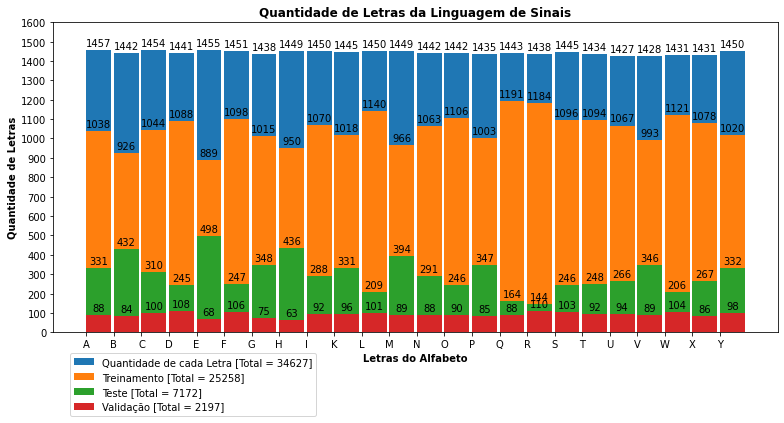

In [ ]:
import numpy             as np
import matplotlib.pyplot as plt

# CRIA A VARIÁVEL COM A QUANTIDADE DE REPETIÇÕES DE CADA LETRA
quant_train_letra_cont = np.unique(saida_train_letras, return_counts = True)
quant_valid_letra_cont = np.unique(saida_valid_letras, return_counts = True)
quant_teste_letra_cont = np.unique(saida_teste_letras, return_counts = True)

#print("quant_train_letra_cont: ", quant_train_letra_cont)
#print("---------------------------------------------------------------------")
#print("quant_valid_letra_cont: ", quant_valid_letra_cont)
#print("---------------------------------------------------------------------")

#CRIA A VÁRIAVEL QUE ASSOCIA A LETRA DO ALFABETO
indice_graf_01 = quant_teste_letra_cont[0]
#print("indice_graf_01: ", indice_graf_01)

total_letras_train = quant_train_letra_cont[1]
total_letras_valid = quant_valid_letra_cont[1]
total_letras_teste = quant_teste_letra_cont[1]
total_letras       = quant_train_letra_cont[1] + quant_teste_letra_cont[1] + quant_valid_letra_cont[1]


rotulos = ("A","B","C","D","E","F","G","H","I","K","L","M",
           "N","O","P","Q","R","S","T","U","V","W","X","Y")

largura = 0.9

fig, ax = plt.subplots(figsize = (11,6))

#print(indice_graf_01 + largura/2)

#rects_total = ax.bar(x + largura/2,
rects_total = ax.bar(x      = indice_graf_01 + largura/2, 
                     height = total_letras, 
                     width  = largura, 
                     label  = 'Quantidade de cada Letra [Total = {}]'.format(sum(total_letras)))

rects_train = ax.bar(x      = indice_graf_01 + largura/2,
                     height = total_letras_train, 
                     width  = largura, 
                     label  = 'Treinamento [Total = {}]'.format(sum(total_letras_train)))

rects_teste = ax.bar(x      = indice_graf_01 + largura/2,
                     height = total_letras_teste, 
                     width  = largura, 
                     label  = 'Teste [Total = {}]'.format(sum(total_letras_teste)))

rects_valid = ax.bar(x      = indice_graf_01 + largura/2,
                     height = total_letras_valid, 
                     width  = largura, 
                     label  = 'Validação [Total = {}]'.format(sum(total_letras_valid)))

ax.set_ylabel("Quantidade de Letras",                       fontweight = 'bold')
ax.set_xlabel("Letras do Alfabeto",                         fontweight = 'bold')
ax.set_title("Quantidade de Letras da Linguagem de Sinais", fontweight = 'bold')
ax.set_yticks(np.arange(0,1800,200))
ax.set_xticks(indice_graf_01)
ax.set_xticklabels(rotulos)
ax.legend(loc = 'upper right', bbox_to_anchor = (0.37, -0.05))
ax.set_yticks(np.arange(0,1700, 100))

def autolabel(rects):
    for rect in rects:
      # CAPTURA A ALTURA DA BARRA DO GRÁFICO
      altura = rect.get_height()

      # POSICIONA A ALTURA EM SIMA DA BARRA
      ax.annotate('{}'.format(altura),
                  xy     = (rect.get_x() + rect.get_width() / 2, altura),
                  xytext = (0, 2),  # DEFINE A ALTURA QUE EXIBE QUANTIDADE DE AMOSTRAS
                  textcoords = "offset points", # O DESLOCAMENTO SERÁ EM PONTOS
                  ha = 'center', 
                  va = 'bottom')

autolabel(rects_total)
autolabel(rects_train)
autolabel(rects_teste)
autolabel(rects_valid)

fig.tight_layout()

plt.show()

#04 - PLOTAR UMA IMAGEM DA LINGUAGEM DE SINAL

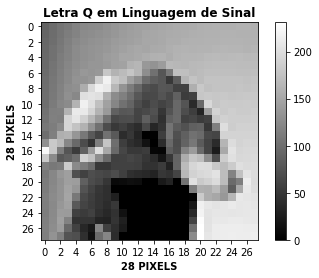

In [ ]:
from random import randint

#letra_dic={ 0:"A", 1:"B", 2:"C", 3:"D", 4:"E", 5:"F",
diconario_alfabeto = { 0:"A", 1:"B", 2:"C", 3:"D", 4:"E", 5:"F",
                       6:"G", 7:"H", 8:"I", 9:"K",10:"L",11:"M",
                      12:"N",13:"O",14:"P",15:"Q",16:"R",17:"S",
                      18:"T",19:"U",20:"V",21:"W",22:"X",23:"Y"}

# COPIA OS DADOS DE TREINAMENTO PARA A VARIÁVEL entrada_train_graf_02
entrada_train_grafico_02 = dados_train.copy()

# CRIA A VARIÁVEL saida_train_graf_02 COM OS DADOS COM OS INDICES DA LETRAS
saida_train_grafico_02 = dados_train['label']

# REMOVE A COLUNA COM OS INDICES DAS RELACIONADO AS LETRAS DO ALFABETO
entrada_train_grafico_02.drop('label', axis = 1, inplace = True)
#print("entrada_train_graf_04", entrada_train_graf_04)

# CONVERTE O INDICE DAS LETRAS PARA A REPRESENTAÇÃO EM BINÁRIO
train_classe = letra_binario.fit_transform(saida_train_grafico_02)
#print(train_classe)

# CRIA A VARIÁVEIS PARA O TREINAMENTO NA REDE NEURAIS
grafico_02_train_pixels = entrada_train_grafico_02.values.reshape(train_classe.shape[0],28,28,1)

# ESSA VARIÁVEL IRÁ ESCOLHER UMA LETRA ALEATÓRIA DO DICIONÁRIO DO ALFABETO
indice_grafico_02 = randint(0,24)
#print("indice_graf_02", indice_graf_02)

# ESCOLHE OS DADOS RELACIONADO AO INDICE ALEATÓRIO
letra_grafico_02 = diconario_alfabeto[saida_train_grafico_02[indice_grafico_02]]
#print("letra: ", letra_dic[graf_04_train_saida[indice]])

plt.imshow(grafico_02_train_pixels[indice_grafico_02].reshape(28,28),      cmap = "gray")
plt.title("Letra {} em Linguagem de Sinal".format(letra_grafico_02), fontweight = 'bold')
plt.xlabel('28 PIXELS', fontweight = 'bold')
plt.ylabel('28 PIXELS', fontweight = 'bold')
plt.xticks(np.arange(0, 28, 2))
plt.yticks(np.arange(0, 28, 2))
plt.colorbar()

#05 - PLOTAR IMAGENS DO CONJUNTO DE TREINAMENTO

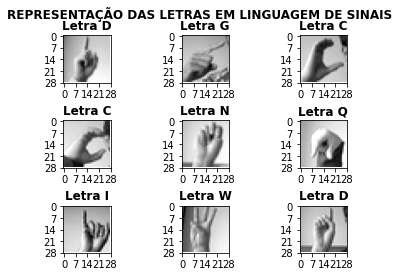

In [ ]:
coluna_grafico_03 = 3
linha_grafico_03  = 3

for i in range(9):
    plt.subplot(linha_grafico_03, coluna_grafico_03, 1 + i)
    #print("letra: ", letra_dic[graf_04_train_saida[i]])
    
    letra = diconario_alfabeto[saida_train_grafico_02[i]]

    plt.imshow(grafico_02_train_pixels[i].reshape(28,28), cmap = "gray")
    plt.title("Letra {}".format(letra), fontweight = 'bold')
    plt.xticks(np.arange(0, 30, 7))
    plt.yticks(np.arange(0, 30, 7))

plt.suptitle("REPRESENTAÇÃO DAS LETRAS EM LINGUAGEM DE SINAIS", fontweight = 'bold')
plt.subplots_adjust(wspace = 0.2)
plt.subplots_adjust(hspace = 0.8)
plt.show()

#06 - CRIANDO A REDE NEURAL CONVOLUCIONAL

In [ ]:
from keras.models                import Sequential
from keras.layers                import Conv2D
from keras.layers                import MaxPooling2D
from keras.layers                import Flatten
from keras.layers                import Dense
from keras.layers.normalization  import BatchNormalization
from keras.layers                import Dropout
#from keras.optimizers            import Adam # EM TESTE

#--------------- VARIÁVEIS -------------------
'''
Para saber quantos neuronios ocultos posso ter, para teste pode ser calculado da seguinte forma: caso tivesse 1 convolução seria 13x13 = 169 -> 169+10 = 179 -> 179/2 = 89.5 + ou - 90 neuroinios na camada oculta
'''
QUANTIDADE_FILTROS     = 128
KERNEL_DIMENSAO        = 3
PASSOS                 = 1
PIXEL                  = 28
CANAL                  = 1
MAX_DIMENSAO           = 2
NUMERO_CAMADA_OCULTA   = 4
NEURONIO_CAMADA_OCULTA = 128
ATIVACAO               = 'relu'
TAXA_NEURONIO_IGNORADO = 0.25
#NEURONIO_SAIDA         = len(labels)#24
NEURONIO_SAIDA         = len(indice_graf_01)
MOMENTUM               = 0.95
#---------------------------------------------

def rede_neural(momento,
                quantidade_filtros,
                kernel_dimensao,
                passos,
                pixel,
                canal,
                max_dimensao,
                numero_camda_oculta,
                ativacao,
                neuronio_camada_oculta,
                taxa_neuronio_ignorado,
                neuronio_saida):
    
    rede = Sequential(name = "Sequential")
    
    #********************* CONVOLUÇÃO DA IMAGEM ******************************
    #--------- ETAPA 01: OPERADOR DE CONVOLUÇÃO --------------------------------|
    # ESSA ETAPA CRIA UM MAPA DE CARACTERÍSTICAS
    
    rede.add(Conv2D(filters     = quantidade_filtros,
                    kernel_size = (kernel_dimensao, kernel_dimensao),
                    strides     = (passos, passos),
                    input_shape = (pixel, pixel, canal), 
                    activation  = 'relu',
                    name = 'Convolucao_1'))
    
    #BatchNormalization(axis=1,momentum=0.99,episilon=0.001,center=True,scale=True)
    rede.add(BatchNormalization(momentum = momento,
                                name     = 'Normalizacao_1'))
    
    rede.add(MaxPooling2D(pool_size = (max_dimensao, max_dimensao),
                          name      = 'Max_Pooling_1'))
    
    
    #------------------------- CONVOLUÇÃO 02 ----------------------------
    rede.add(Conv2D(filters     = quantidade_filtros, 
                    kernel_size = (kernel_dimensao, kernel_dimensao),
                    strides     = (passos, passos),
                    activation  = 'relu', 
                    name        = 'Convolucao_2'))
    
    rede.add(BatchNormalization(momentum = momento,
                                name     = 'Normalizacao_2'))
    
    rede.add(MaxPooling2D(pool_size = (max_dimensao, max_dimensao),
                          name      = 'Max_Pooling_2'))
    
    #------------------------- CONVOLUÇÃO 03 ----------------------------
    rede.add(Conv2D(filters     = quantidade_filtros,
                    kernel_size = (kernel_dimensao, kernel_dimensao),
                    strides     = (passos, passos),
                    activation  = 'relu',
                    name        = 'Convolucao_3'))
    
    rede.add(BatchNormalization(momentum = momento,
                                name     = 'Normalizacao_3'))
    
    rede.add(MaxPooling2D(pool_size = (max_dimensao, max_dimensao),
                          name      = 'Max_Pooling_3'))
    
    #----------------------- SAÍDA DA CONVOLUÇÃO --------------
    rede.add(Flatten(name = 'Camada_Entrada'))
    
    #********************* REDE NEURAL ***************************************

    for i in range(numero_camda_oculta):
        #print("numero_camda_oculta", numero_camda_oculta)
        rede.add(Dense(units      = neuronio_camada_oculta,
                       activation = ativacao,
                       name       = "Camada_Oculta_{}".format(str(i+1))))
        
        rede.add(Dropout(rate = taxa_neuronio_ignorado,
                         name = 'Ignora_Neuronio_{}'.format(str(i+1))))
        
    #********************* CAMADA DE SAIDA DA REDE ***************************
    rede.add(Dense(units      = neuronio_saida,
                   activation = 'softmax',
                   name       = 'Camada_Saida'))
        
    rede.compile(optimizer = 'adam',
                 loss      = 'categorical_crossentropy',
                 metrics   = ['accuracy'])
        
    return rede
   
modelo = rede_neural(MOMENTUM,
                     QUANTIDADE_FILTROS,
                     KERNEL_DIMENSAO,
                     PASSOS,
                     PIXEL,
                     CANAL,
                     MAX_DIMENSAO,
                     NUMERO_CAMADA_OCULTA,
                     ATIVACAO,
                     NEURONIO_CAMADA_OCULTA,
                     TAXA_NEURONIO_IGNORADO,
                     NEURONIO_SAIDA)
print(modelo.summary())


Model: "Sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Convolucao_1 (Conv2D)        (None, 26, 26, 128)       1280      
_________________________________________________________________
Normalizacao_1 (BatchNormali (None, 26, 26, 128)       512       
_________________________________________________________________
Max_Pooling_1 (MaxPooling2D) (None, 13, 13, 128)       0         
_________________________________________________________________
Convolucao_2 (Conv2D)        (None, 11, 11, 128)       147584    
_________________________________________________________________
Normalizacao_2 (BatchNormali (None, 11, 11, 128)       512       
_________________________________________________________________
Max_Pooling_2 (MaxPooling2D) (None, 5, 5, 128)         0         
_________________________________________________________________
Convolucao_3 (Conv2D)        (None, 3, 3, 128)         1

# 06.1 - CRIA UM FLUXOGRAMA DA REDE NEURAL CONVOLUCIONAL

In [ ]:
# EXECUTÇÃO OPCIONAL - APENAS PARA ANALISE DA ESTRUTURA DA REDE NEURAL
from keras.utils.vis_utils import plot_model
plot_model(modelo, 
           to_file          = 'Estrutura_da_Rede.png', 
           show_shapes      = True, 
           show_layer_names = True)

#07 - TREINAMENTO DA REDE NEURAL CONVOLUCIONAL




In [86]:
import datetime
from keras.callbacks import TensorBoard

EPOCAS          = 50
TAMANHO_LOTE    = 32 # TENTAR COM 64 DE ACORDO COM O DEEP LEARNING BOOK - CAPITULO 37
BARRA_PROGRESSO = 0

dicionario_historico = {}

modelo_2 = rede_neural(MOMENTUM,
                       QUANTIDADE_FILTROS,
                       KERNEL_DIMENSAO,
                       PASSOS,
                       PIXEL,
                       CANAL,
                       MAX_DIMENSAO,
                       NUMERO_CAMADA_OCULTA, 
                       ATIVACAO,
                       NEURONIO_CAMADA_OCULTA,
                       TAXA_NEURONIO_IGNORADO,
                       NEURONIO_SAIDA)
# PARA RODAR O GRAFICO TENSORBOARD DIGITAR NO "ANACONDA PROMPT"
# tensorboard --logdir logs\ --host localhost --port 6006

log_dir = "logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") # TESTANDO

log_callbacks = TensorBoard(log_dir = log_dir) # TESTEANDO

chamada_historico = modelo_2.fit(dados_entrada_train_pixels,
                                 dados_saida_train_letras,
                                 epochs          = EPOCAS,
                                 batch_size      = TAMANHO_LOTE,
                                 validation_data = (dados_entrada_valid_pixels, 
                                                    dados_saida_valid_letras),
                                 shuffle         = True, # TESTE
                                 callbacks       = [log_callbacks])

ponto = modelo_2.evaluate(dados_entrada_teste_pixels, 
                          dados_saida_teste_letras,
                          verbose = BARRA_PROGRESSO)

#print(   "Perda de Teste: ", ponto[0])
#print("Teste de Precisão: ", ponto[1])

dicionario_historico = [chamada_historico]

Epoch 1/50
790/790 [==============================] - 119s 150ms/step - loss: 1.9065 - accuracy: 0.4103 - val_loss: 0.4906 - val_accuracy: 0.8430
Epoch 2/50
790/790 [==============================] - 117s 148ms/step - loss: 0.1589 - accuracy: 0.9499 - val_loss: 0.0145 - val_accuracy: 0.9950
Epoch 3/50
790/790 [==============================] - 114s 145ms/step - loss: 0.0786 - accuracy: 0.9786 - val_loss: 0.0239 - val_accuracy: 0.9954
Epoch 4/50
790/790 [==============================] - 114s 145ms/step - loss: 0.0769 - accuracy: 0.9801 - val_loss: 0.0644 - val_accuracy: 0.9895
Epoch 5/50
790/790 [==============================] - 114s 144ms/step - loss: 0.0425 - accuracy: 0.9889 - val_loss: 0.1388 - val_accuracy: 0.9672
Epoch 6/50
790/790 [==============================] - 113s 143ms/step - loss: 0.0574 - accuracy: 0.9869 - val_loss: 0.0631 - val_accuracy: 0.9854
Epoch 7/50
790/790 [==============================] - 113s 143ms/step - loss: 0.0307 - accuracy: 0.9931 - val_loss: 0.0139 -

#08 - GRÁFICO DO TREINAMENTO

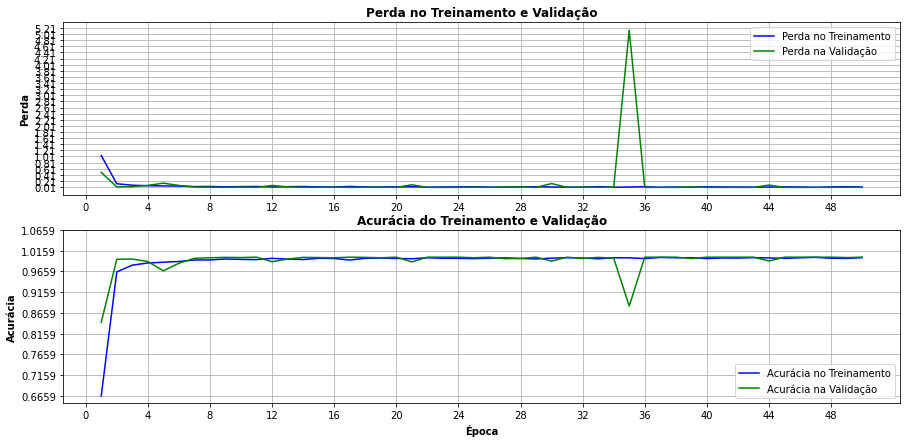

In [87]:
comprimento = 15
altura      = 7
linha       = 2
coluna      = 1
maior_loss  = 0
menor_acc   = 1
i           = 0

# DEVIDO A NOVA ATUALIZAÇÃO DO KERAS O history[acc] MUDOU PARA history[]

tra_loss_values = dicionario_historico[0].history['loss']
tra_acc_values  = dicionario_historico[0].history['accuracy']
val_loss_values = dicionario_historico[0].history['val_loss'] 
val_acc_values  = dicionario_historico[0].history['val_accuracy']


#--------------- PARA AJUSTAS OS GRÁFICOS -------------------------------
for i in range(len(tra_loss_values)):
    
    #print("tra_loss_values[{}]: {}".format(i, tra_loss_values[i]))
    #print("val_loss_values[{}]: {}".format(i, val_loss_values[i]))
    
    if(maior_loss < tra_loss_values[i]):
        maior_loss = tra_loss_values[i]
        #print("Maior é loss_values:", maior_loss)
    #elif(maior_loss < val_loss_values[i]):
    if(maior_loss < val_loss_values[i]):
        #print("val_loss_values[{}]: {}".format(i, val_loss_values[i]))
        maior_loss = val_loss_values[i]
        #print("Maior é val_loss_values:", maior_loss)
       
    if(menor_acc > tra_acc_values[i]):# OK
        menor_acc = tra_acc_values[i]
        #print("Menor é acc_values:", menor_acc)    
    #elif(menor_acc > val_acc_values[i]):
    if(menor_acc > val_acc_values[i]):
        menor_acc = val_acc_values[i] # OK
        #print("Menor é val_acc_values:", menor_acc)
        

x_0   = 0
x_n   = EPOCAS
x_i   = 4

y_0_1 = 0.01
y_n_1 = maior_loss + 0.1
y_i_1 = 0.2

y_0_2 = menor_acc 
y_n_2 = 1.1
y_i_2 = 0.05

epocas     = range(1, len(tra_loss_values) + 1)
epocas_dic = {epocas}
#-----------------------------------------------------------------------

plt.figure(figsize = (comprimento, altura))

plt.subplot(linha, coluna, 1)
plt.plot(epocas, tra_loss_values, 'b', label = 'Perda no Treinamento')
plt.plot(epocas, val_loss_values, 'g', label = 'Perda na Validação')
plt.title('Perda no Treinamento e Validação', fontweight = 'bold')
plt.ylabel('Perda',                           fontweight = 'bold')
plt.xticks(np.arange(x_0, x_n+1, x_i))
plt.yticks(np.arange(y_0_1, y_n_1+0.01, y_i_1))
plt.grid()
plt.legend()

plt.subplot(linha, coluna, 2)
plt.plot(epocas, tra_acc_values, 'b', label = 'Acurácia no Treinamento')
plt.plot(epocas, val_acc_values, 'g', label = 'Acurácia na Validação')
plt.title('Acurácia do Treinamento e Validação', fontweight = 'bold')
plt.xlabel('Época',                              fontweight = 'bold')
plt.ylabel('Acurácia',                           fontweight = 'bold')
plt.xticks(np.arange(x_0,x_n+1,x_i))
plt.yticks(np.arange(y_0_2, y_n_2, y_i_2))
plt.grid()
plt.legend()

plt.show()

#09 - GRÁFICO DA CURVA ROC-AUC

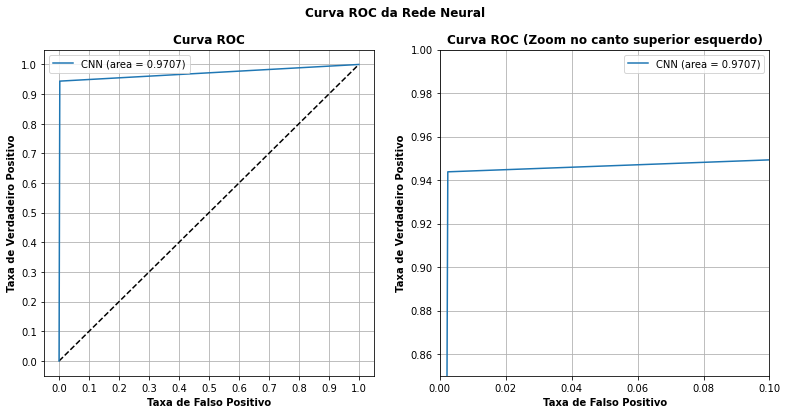

In [88]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from keras.utils     import to_categorical

#previsao = modelo_2.predict_classes(entrada_teste_imagem, verbose = 1).ravel() # Deprecated
previsao = np.argmax(modelo_2.predict(dados_entrada_teste_pixels), axis=-1) # OK 

saida_previsao = to_categorical(previsao, 24)

fpr, tpr, thresholds = roc_curve(dados_saida_teste_letras.ravel(), saida_previsao.ravel())

auc_keras = auc(fpr, tpr)


linha_02       = 1
coluna_02      = 2
comprimento_02 = 13
altura_02      = 6 

plt.figure(figsize = (comprimento_02, altura_02))
plt.subplot(linha_02, coluna_02, 1)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label = 'CNN (area = {:.4f})'.format(auc_keras))
plt.xlabel('Taxa de Falso Positivo',      fontweight = 'bold')
plt.ylabel('Taxa de Verdadeiro Positivo', fontweight = 'bold')
plt.title('Curva ROC',                    fontweight = 'bold')
plt.yticks(np.arange(0, 1.01, 0.1))
plt.xticks(np.arange(0, 1.01, 0.1))
plt.legend(loc='best')
plt.grid()

plt.subplot(linha_02, coluna_02, 2)
plt.xlim(0,0.1)
plt.ylim(0.85,1)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label = 'CNN (area = {:.4f})'.format(auc_keras))
plt.xlabel('Taxa de Falso Positivo',                     fontweight = 'bold')
plt.ylabel('Taxa de Verdadeiro Positivo',                fontweight = 'bold')
plt.title('Curva ROC (Zoom no canto superior esquerdo)', fontweight = 'bold')
plt.suptitle("Curva ROC da Rede Neural",                 fontweight = 'bold')
plt.legend(loc='best')
plt.grid()
plt.show()

#10 - GRÁFICO DA CURVA ROC-AUC PARA CADA LETRA DO ALFABETO

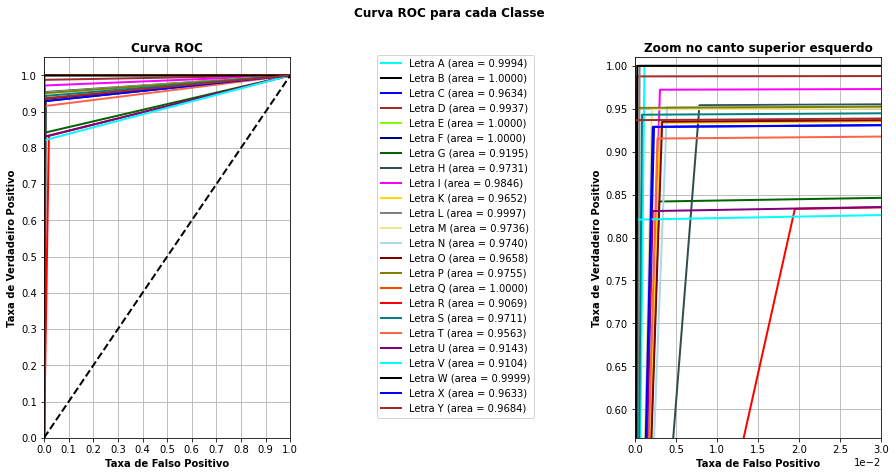

In [89]:
from sklearn.metrics import roc_curve, auc

lw        = 2
menor_tpr = 0

fpr_dic     = dict()
tpr_dic     = dict()
roc_auc_dic = dict()

n_classes = saida_previsao.shape[1]

for i in range(n_classes):

    fpr_dic[i], tpr_dic[i], _ = roc_curve(dados_saida_teste_letras[:,i], 
                                          saida_previsao[:,i], 
                                          pos_label = 1)
    
    roc_auc_dic[i]            = auc(fpr_dic[i], tpr_dic[i])
    
    media_tpr = sum(tpr_dic[i])/3
    
    if(menor_tpr < media_tpr):
        menor_tpr = media_tpr

fpr_dic['micro'], tpr_dic['micro'], _ = roc_curve(dados_saida_teste_letras.ravel(),
                                                  saida_previsao.ravel())

roc_auc_dic['micro'] = auc(fpr_dic['micro'], 
                           tpr_dic['micro'])

all_fpr = np.unique(np.concatenate([fpr_dic[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr_dic[i], tpr_dic[i])

mean_tpr /= n_classes

fpr_dic['macro']     = all_fpr
tpr_dic['macro']     = mean_tpr
roc_auc_dic['macro'] = auc(fpr_dic['macro'], tpr_dic['macro'])



from itertools       import cycle

letra_dic_13 = { 0:"A", 1:"B", 2:"C", 3:"D", 4:"E", 5:"F", 
                 6:"G", 7:"H", 8:"I", 9:"K",10:"L",11:"M",
                12:"N",13:"O",14:"P",15:"Q",16:"R",17:"S",
                18:"T",19:"U",20:"V",21:"W",22:"X",23:"Y"}

comprimento_03 = 15
altura_03      = 7
linha_03       = 1
coluna_03      = 3
x0_2           = 0
xn_2           = 1
xi_2           = 0.1
y0_2           = 0       
yn_2           = 1
yi_2           = 0.1

plt.figure(figsize = (comprimento_03, altura_03))
plt.subplot(linha_03, coluna_03, 1)

colors = cycle(['aqua',         # A
                'black',        # B
                'blue',         # C
                'brown',        # D
                'chartreuse',   # E
                'darkblue',     # F
                'darkgreen',    # G
                'darkslategray',# H
                'fuchsia',      # I
                'gold',         # K
                'grey',         # L
                'khaki',        # M
                'lightblue',    # N
                'maroon',       # O
                'olive',        # P
                'orangered',    # Q
                'red',          # R
                'teal',         # S
                'tomato',       # T
                'purple'])

for i, color in zip(range(n_classes), colors):
    letras_1 = letra_dic_13[i]
    plt.plot(fpr_dic[i], 
             tpr_dic[i], 
             color = color, 
             lw    = lw,
             label = 'Letra {0} (area = {1:0.4f})'.format(letras_1, roc_auc_dic[i]))
    

plt.plot([0, 1], [0,1], 'k--', lw = lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Taxa de Falso Positivo",      fontweight = 'bold')
plt.ylabel("Taxa de Verdadeiro Positivo", fontweight = 'bold')
plt.xticks(np.arange(x0_2, xn_2+0.1, xi_2))
plt.yticks(np.arange(y0_2, yn_2+0.1, yi_2))
plt.title("Curva ROC", fontweight = 'bold')
plt.legend(loc = 'upper right', bbox_to_anchor = (2.01, 1.02))
plt.grid()

#------------ ZOOM NO CANTO SUPERIOR ESQUERDO DO GRÁFICO -------
x0_zoom = 0
xn_zoom = 0.03
y0_zoom = menor_tpr - 0.1
yn_zoom = 1.01

plt.subplot(linha_03, coluna_03, 3)
plt.xlim(x0_zoom, xn_zoom)
plt.ylim(y0_zoom, yn_zoom)

colors = cycle(['aqua',         # A
                'black',        # B
                'blue',         # C
                'brown',        # D
                'chartreuse',   # E
                'darkblue',     # F
                'darkgreen',    # G
                'darkslategray',# H]
                'fuchsia',      # I
                'gold',         # K
                'grey',         # L
                'khaki',        # M
                'lightblue',    # N
                'maroon',       # O
                'olive',        # P
                'orangered',    # Q
                'red',          # R
                'teal',         # S
                'tomato',       # T
                'purple'])


for i, color in zip(range(n_classes), colors):
    letras_2 = letra_dic_13[i]
    plt.plot(fpr_dic[i], 
             tpr_dic[i], 
             color = color, 
             lw    = lw,
             label = 'Letra {0} (area = {1:0.4f})'.format(letras_2, roc_auc_dic[i]))

plt.plot([0, 1], [0,1], 'k--', lw = lw)
plt.xlabel("Taxa de Falso Positivo", fontweight = 'bold')
plt.ylabel("Taxa de Verdadeiro Positivo", fontweight = 'bold')
plt.title("Zoom no canto superior esquerdo", fontweight = 'bold')
plt.ticklabel_format(style = 'sci', axis = 'x', scilimits = (0,0))
plt.suptitle("Curva ROC para cada Classe", fontweight = 'bold')
plt.grid()
plt.show()


#11 - GRÁFICO DA MATRIZ DE CONFUSÃO

225/225 [==============================] - 7s 32ms/step


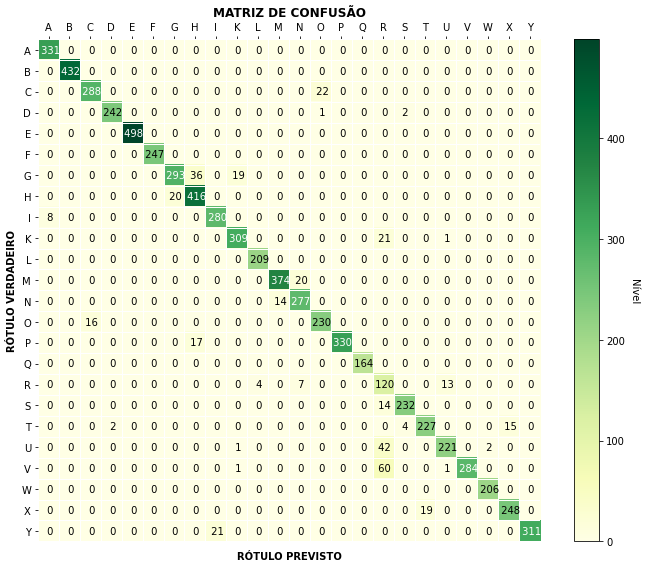

In [90]:
import matplotlib
from sklearn.metrics import confusion_matrix

y_pred      = modelo_2.predict(dados_entrada_teste_pixels, batch_size = 32, verbose = 1)
y_predicted = np.argmax(y_pred, axis = 1)

saida_teste_classe_bin = np.argmax(dados_saida_teste_letras, axis = 1)

y_cm = confusion_matrix(saida_teste_classe_bin, y_predicted)
y_df_cm = pd.DataFrame(y_cm, range(24), range(24))


def heatmap(data,row_labels,col_labels, ax=None, cbar_kw={}, cbarlabel="", **kwargs):
    if not ax:
        ax = plt.gca()
        
    im = ax.imshow(data, **kwargs)
    
    cbar = ax.figure.colorbar(im, ax = ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation = -90, va = "bottom")
    
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)
    
    ax.set_xlabel("RÓTULO PREVISTO",   fontweight = 'bold')
    ax.set_ylabel("RÓTULO VERDADEIRO", fontweight = 'bold')
    
    ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
    
    plt.setp(ax.get_xticklabels(), rotation=0, ha="center", rotation_mode="anchor")
    
    for edge, spine in ax.spines.items():
        spine.set_visible(False)
        
    ax.set_xticks(np.arange(data.shape[1] + 1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0] + 1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=1.035)
    ax.tick_params(which="minor", bottom=False, left=False)
    
    return im, cbar

def annotate_heatmap(im, data=None, valfmt="{x:.2f}", textcolor = ["black", "white"],threshold=None, **textkw):
    
    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()
    
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.
    
    kw = dict(horizontalalignment = "center",
              verticalalignment = "center")
    
    kw.update(textkw)
    
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)
        
    texts = []
    
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolor[int(im.norm(data[i,j]) > threshold)])
            text = im.axes.text(j,i, valfmt(data[i,j], None), **kw)
            texts.append(text)
            
    return texts

alfab = ["A","B","C","D","E","F","G","H","I","K","L","M",
         "N","O","P","Q","R","S","T","U","V","W","X","Y"]

fig, ax = plt.subplots(figsize = (10,8))

im, cbar = heatmap(y_cm, alfab, alfab, ax=ax, cmap = "YlGn", cbarlabel = "Nível")
texts = annotate_heatmap(im, valfmt = "{x: d}")

ax.set_title("MATRIZ DE CONFUSÃO", fontweight = 'bold')
fig.tight_layout()
plt.show()

#12 - COLETANDO OS DADOS DE VP, VN, FP E FN

In [91]:
import numpy as np
import pandas as pd

linha  = y_cm.shape[0]
coluna = y_cm.shape[0]

aux    = y_cm.copy()
matriz = y_cm.copy()

classe = ["Letra A","Letra B","Letra C","Letra D","Letra E","Letra F",
          "Letra G","Letra H","Letra I","Letra K","Letra L","Letra M",
          "Letra N","Letra O","Letra P","Letra Q","Letra R","Letra S",
          "Letra T","Letra U","Letra V","Letra W","Letra X","Letra Y"]


#---------------- TRUE POSITIVO -----------------------------------------------

tp = []
for i in range(linha):
    for j in range(coluna):
        if(i==j): tp.append(aux[i][j])

mc_tp_df = pd.DataFrame(data = tp, index = classe, columns = ["TP"])


#---------------- FALSO NEGATIVO ---------------------------------------------- 
i_FN = ["FN_A","FN_B","FN_C","FN_D","FN_E","FN_F","FN_G","FN_H","FN_I","FN_K","FN_L","FN_M",
        "FN_N","FN_O","FN_P","FN_Q","FN_R","FN_S","FN_T","FN_U","FN_V","FN_W","FN_X","FN_Y"]
fn = np.random.randint(24, size = (24,1))
fn_df = pd.DataFrame(data = aux)

for i in range(linha):
    for j in range(coluna):
        if(i==j): fn_df[i][j] = 0

mc_fn_df = pd.DataFrame(data = aux, index = i_FN, columns = classe)


#---------------- FALSO POSITIVO ----------------------------------------------
i_FP = ["FP_A","FP_B","FP_C","FP_D","FP_E","FP_F","FP_G","FP_H","FP_I","FP_K","FP_L","FP_M",
        "FP_N","FP_O","FP_P","FP_Q","FP_R","FP_S","FP_T","FP_U","FP_V","FP_W","FP_X","FP_Y"]

mc_fp_df = pd.DataFrame(data = aux.T, index = i_FP, columns = classe)


#---------------- TRUE NEGATIVE -----------------------------------------------
tn = np.random.randint(24, size = (24,1))
for i in range(linha):
    
    tp_aux = mc_tp_df.iloc[i].sum()
    fp_aux = mc_fp_df.iloc[i:i+1,:].sum(1)
    fn_aux = mc_fn_df.iloc[i:i+1,:].sum(1)
    
    tn[i][0] = (matriz.sum()) - (tp_aux.sum() + fp_aux.sum() + fn_aux.sum())

mc_tn_df = pd.DataFrame(data = tn, index = [classe], columns = ["TN"])

#13 - CALCULO DA ACURÁCIA, RECALL, PRECISÃO E F1-SCORE

In [92]:
aval_desemp   = np.zeros((25,4))
linha_aval    = y_cm.shape[0]
coluna_aval   = y_cm.shape[1]
coluna_desemp = aval_desemp.shape[1]

#---------------- CALCULA DA ACURÁCIA, RECALL e PRECISÃO ----------------------

for i in range(linha_aval):
    TP_aux = mc_tp_df.iloc[i:i+1,:].sum(axis = 0)
    TP_aux = sum(TP_aux)

    TN_aux = mc_tn_df.iloc[i:i+1,:].sum(axis = 0)
    TN_aux = sum(TN_aux)
    
    FP_aux = mc_fp_df.iloc[i:i+1,:].sum(axis = 1)
    FP_aux = sum(FP_aux)
    
    FN_aux = mc_fn_df.iloc[i:i+1,:].sum(axis = 0)
    FN_aux = sum(FN_aux)
    
    # ACURÁCIA
    aval_desemp[i][0] = (TP_aux + TN_aux)/(TP_aux + FP_aux + TN_aux + FN_aux)
    
    # RECALL
    aval_desemp[i][1] = (TP_aux)/(TP_aux + FN_aux)
    recall = aval_desemp[i][1]
    
    # PRECISION
    aval_desemp[i][2] = (TP_aux)/(TP_aux + FP_aux)
    precisao = aval_desemp[i][2]
    
    # F1-SCORE
    aval_desemp[i][3] = (2*(precisao * recall))/(precisao + recall)

#---------- CALCULO DO TOTAL --------------------------------------------------
for i in range(coluna_desemp):
    aval_desemp[24][i] = sum(aval_desemp[::,i])/linha_aval

#---------- DATAFRAME DA AVALIAÇÃO DE DESEMPENHO ------------------------------
classe_1 = ['A','B','C','D','E','F','G','H',
            'I','K','L','M','N','O','P','Q',
            'R','S','T','U','V','W','X','Y',
            'Média']

avaliacao = ["Acurácia","Recall","Precisão","F1-Score"]

aval_desemp_df = pd.DataFrame(data = aval_desemp, index = [classe_1], columns = [avaliacao])

#14 - GRÁFICO EM BARRA DE ACURÁCIA, RECALL, PRECISÃO E F1-SCORE

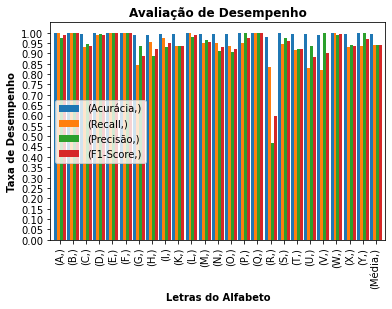

In [93]:
aval_desemp_df.plot.bar(width = 0.9) # OK

plt.title("Avaliação de Desempenho", fontweight = 'bold')
plt.xlabel("Letras do Alfabeto",     fontweight = 'bold')
plt.ylabel("Taxa de Desempenho",     fontweight = 'bold')
plt.yticks(np.arange(0, 1.05, 0.05))
plt.legend(loc = 'center left')
plt.show()




# 15 - VERIFICAÇÃO DA PREVISÃO

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


([<matplotlib.axis.YTick at 0x7f6c9ff1add0>,
 <a list of 14 Text major ticklabel objects>)

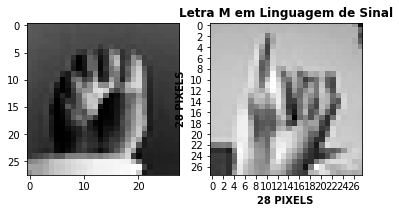

In [98]:
from random import randint

letra_dic = { 0:"A", 1:"B", 2:"C", 3:"D", 4:"E", 5:"F",
              6:"G", 7:"H", 8:"I", 9:"K",10:"L",11:"M",
             12:"N",13:"O",14:"P",15:"Q",16:"R",17:"S",
             18:"T",19:"U",20:"V",21:"W",22:"X",23:"Y"}

# COPIA OS DADOS DA base_teste PARA graf_teste_entrada
#graf_teste_entrada = base_teste.copy()
graf_teste_entrada = dados_teste.copy()

# SALVA OS rótulos NA BASE graf_teste_saida
#graf_teste_saida   = base_teste['label']
graf_teste_saida   = dados_teste['label']

# RETIRA OS rótulos E SALVA DA BASE graf_teste_saida
graf_teste_entrada.drop('label', axis = 1, inplace = True)
#print("graf_04_train_entrada", graf_04_train_entrada)

# TRASFORMA A RESPOSTA EM FORMA BINÁRIA
#teste_classe_prev = label_binarizer.fit_transform(graf_teste_saida)
teste_classe_prev = letra_binario.fit_transform(graf_teste_saida)

graf_teste_imagem = graf_teste_entrada.values.reshape(teste_classe_prev.shape[0],28,28,1)

letra_aleatoria = randint(0, graf_teste_entrada.shape[0])
#print("letra_aleatoria:", letra_aleatoria)
#print("-----------------------------------------")

#previsão = modelo_2.predict_classes(entrada_teste_imagem, verbose =  1).ravel()

previsao_teste = modelo_2.predict_classes(graf_teste_imagem[letra_aleatoria].reshape(1,28,28,1)).ravel()
#print("previsao_teste: ", previsao_teste)
#print("int(previsao_teste): ", int(previsao_teste))
#print("-----------------------------------------")
previsao_teste_prob = modelo_2.predict(graf_teste_imagem[letra_aleatoria].reshape(1,28,28,1))
#print("previsao_teste_prob: ", previsao_teste_prob)
#print(int(previsao_teste_prob))
#print("-----------------------------------------")

letra_prev = letra_dic[int(previsao_teste)]
#print("Indice da Letra: ", graf_teste_saida[letra_aleatoria])
#print("Letra Prevista: ", letra_prev)

fig, (setor1, setor2) = plt.subplots(1,2)

#setor1.imshow(entrada_teste_imagem[letra_aleatoria].reshape(28,28), cmap='Greys')
setor1.imshow(dados_entrada_teste_pixels[letra_aleatoria].reshape(28,28), cmap='Greys')
#plt.imshow(graf_04_train_imagem[previsao_teste.argmax].reshape(28,28), cmap = "gray")
setor2.imshow(graf_teste_imagem[int(previsao_teste)].reshape(28,28), cmap = "gray")
plt.title("Letra {} em Linguagem de Sinal".format(letra_prev), fontweight = 'bold')
plt.xlabel('28 PIXELS',                                        fontweight = 'bold')
plt.ylabel('28 PIXELS',                                        fontweight = 'bold')
plt.xticks(np.arange(0, 28, 2))
plt.yticks(np.arange(0, 28, 2))
#plt.colorbar()
